# Assignment 1

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

### <span style="color:chocolate">Exercise 1:</span> Create data (10 points)

Create artificial data using the function <span style="color:chocolate">create_1d_data()</span> defined at the top of this notebook. Set the following argument values:
- number of examples = 70;
- slope (w) = 2;
- intercept (b) = 1;
- bound = 1.

Denote the output by X and Y. Print the shape and the first 10 elements for each object.

In [3]:
# YOUR CODE HERE
X, Y= create_1d_data(70, 2, 1, 1)

X,Y
print(X.shape, X[0:10])
print(Y.shape, Y[0:10])

(70,) [0 1 2 3 4 5 6 7 8 9]
(70,) [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data preprocessing

Given the simplicity of the data (just one feature in X), our sole task here is to divide the data into training and test sets.

### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.3 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [4]:
# YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1234)

print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of Y_train", Y_train.shape)
print("Shape of X_test", Y_test.shape)

Shape of X_train (49,)
Shape of X_test (21,)
Shape of Y_train (49,)
Shape of X_test (21,)


---
### Step 3: Exploratory data analysis (EDA)

EDA helps us to gain insights into the distribution and characteristics of the dataset we are dealing with. 
This understanding is fundamental for making informed decisions regarding:
- data cleaning;
- feature selection;
- model building;
- model evaluation, etc.

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

1. Generate a scatter plot displaying the X_train data along the x-axis and the Y_train data along the y-axis, ensuring clear labeling of both axes. Add a title "Exploratory Data Analysis: Training Data" and a legend "observed training data" to the plot;
2. Enhance the plot by incorporating a vertical red line to denote the mean value of X_train. Accompany it with a legend clarifying the meaning of the line and the mean value of X_train.

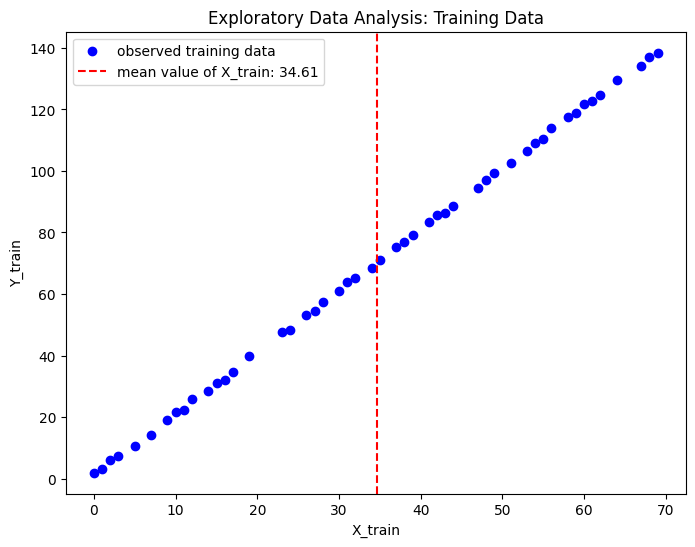

In [5]:
# YOUR CODE HERE

#drawing the plot
plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, label="observed training data", color="blue")

#calculating and adding mean line
mean_X_train =  np.mean(X_train)
plt.axvline(mean_X_train, color="red", linestyle="--", label=f"mean value of X_train: {mean_X_train:.2f}")

#Adding labels and title
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.title('Exploratory Data Analysis: Training Data')

#display legend
plt.legend()

#display plot
plt.show()

---
### Step 4: Modeling

In this section, our objective is to propose models to describe the data generation process. Remember a model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Models for data (10 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_train. These predictions should be vectors of the same shape as Y_train. Call these predictions M1_hat_train and M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
2. Plot the prediction lines of these two models overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend. 

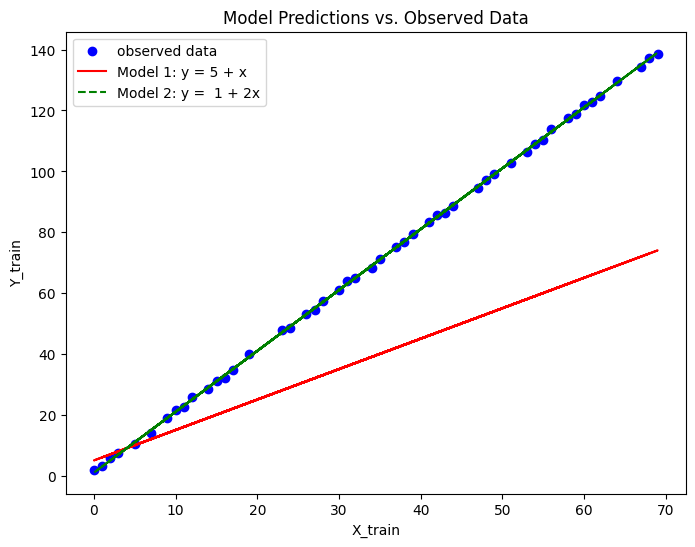

In [6]:
# YOUR CODE HERE
M1_hat_train = 5 + X_train

M2_hat_train = 1 + 2 * X_train

#display the computed predictions
M1_hat_train, M2_hat_train

#plotting observed data and model predictions
plt.figure(figsize = (8,6))
plt.scatter(X_train, Y_train, label= "observed data", color="blue")

#plotting preiction lines of the two models
plt.plot(X_train, M1_hat_train, color = "red", linestyle="-",label='Model 1: y = 5 + x')
plt.plot(X_train, M2_hat_train, color = "green", linestyle="--", label="Model 2: y =  1 + 2x")

#addings labels and titles
plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.title("Model Predictions vs. Observed Data")

plt.legend()
plt.show()

---
### Step 5: Evaluation and Generalization

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{n} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

How well do our models generalize? The test dataset serves as a proxy for unseen data in real-world applications. By evaluating the model on the test data, you can assess its ability to generalize beyond the training data. This ensures that the model can make accurate predictions on new data it hasn't seen during training.

### <span style="color:chocolate">Exercise 5:</span> Computing MSE (20 points)

1. Write a function for computing the MSE metric based on the provided definition;
2. Utilizing this function, calculate the training data MSE for the two models, $M_1$ and $M_2$.
3. Comment on which model fits the training data better.

In [7]:
# YOUR CODE HERE
def MSE(true_values, predicted_values):
  """Return the MSE between true_values and predicted values."""
  squared_errors = sum((true_values - predicted_values)**2)
  mse = squared_errors/len(true_values)
  return mse

In [8]:
# YOUR CODE HERE
mse_M1_train = MSE(Y_train, M1_hat_train)
mse_M2_train = MSE(Y_train, M2_hat_train)

print("Model 1 training MSE:",mse_M1_train)
print("Model 2 training MSE:",mse_M2_train)

Model 1 training MSE: 1358.2515152570322
Model 2 training MSE: 0.31356845204652894


Model 2 with a lower MSE fits the training data better.

### <span style="color:chocolate">Exercise 6:</span> Generalization (15 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_test. These predictions should be vectors of the same shape as Y_test. Call these predictions M1_hat_test and M2_hat_test.
2. Calculate the test data MSE for the two models, $M_1$ and $M_2$, using the <span style="color:chocolate">MSE()</span> function defined above.
3. Does the model you chose in Exercise 5 generalize well?

In [9]:
# YOUR CODE HERE
M1_hat_test = 5 + X_test
M2_hat_test = 1 + 2 * X_test

mse_M1_test = MSE(Y_test, M1_hat_test)
mse_M2_test = MSE(Y_test, M2_hat_test)

print("Model 1 test MSE:", mse_M1_test)
print("Model 2 test MSE:", mse_M2_test)

Model 1 test MSE: 1300.1040149275495
Model 2 test MSE: 0.3370228107719305


Based on the MSE scores, Model 2 also generalizes well on the test data.

### <span style="color:chocolate">Exercise 7:</span> More features (25 points)

1. Fit an 8-th degree polynomial to (X_train, Y_train). Call the predictions of this model M3_hat_train. Hint: see <span style="color:chocolate">np.polyfit()</span> for details.
2. Plot the prediction lines of the $M_3$ overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend. 
3. Calculate the training data MSE for the $M_3$ model using the <span style="color:chocolate">MSE()</span> function defined above.
4. Does model $M_3$ do better than your chosen model in Exercise 5 at predicting the labels for new unseen data? Hint: your new unseen data is the test dataset.

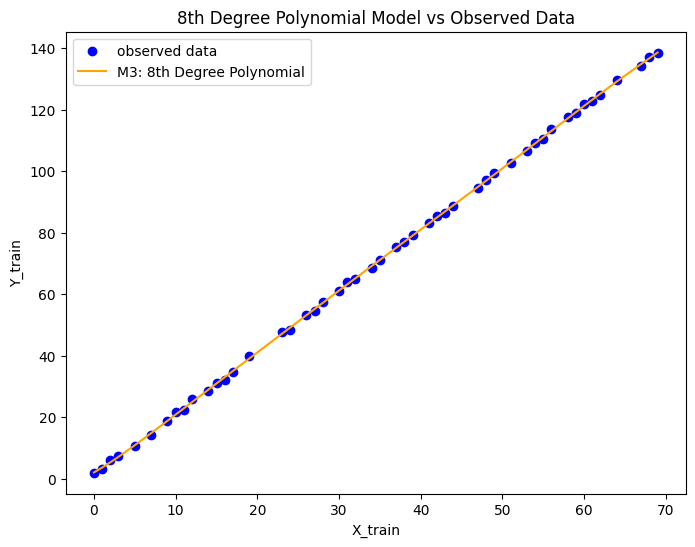

Model 3 Training data MSE: 0.26588964117458547
Model 3 Test data MSE: 0.3968261065064849


In [10]:
# YOUR CODE HERE

# 1. Fitting an 8th degree polynomial to the training data
#to return the coefficients of the polynomial that best fits the data.
coefficients = np.polyfit(X_train, Y_train, 8)

#creating the polynomial model/function
polynomial_model = np.poly1d(coefficients)

#applying poly function to X_train to predict values
M3_hat_train = polynomial_model(X_train)

#2. Plotting observed data and 8th degree polynomial predicton
plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, color='blue', label='observed data')
plt.plot(np.sort(X_train), polynomial_model(np.sort(X_train)), color="orange", linestyle="-",label='M3: 8th Degree Polynomial')

#labels
plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.title("8th Degree Polynomial Model vs Observed Data")

#dsiaplay legend and plot
plt.legend()
plt.show()

# 3. calculating MSE for M3 training data
mse_M3_train = MSE(Y_train, M3_hat_train)
print("Model 3 Training data MSE:", mse_M3_train)

# 4. Calculating M3 predictions for comparison with M2
M3_hat_test = polynomial_model(X_test)

#calculating MSE for M3 TEST data
mse_M3_test = MSE(Y_test, M3_hat_test)
print("Model 3 Test data MSE:", mse_M3_test)

The test MSE for $M_2$ (model 2) 0.34, is lower than the test MSE for $M_3$ (model 3), 0.40. Even though Model 3 fits the training data better than Model 2, model still performs better at predicting unseen data. So, while Model 3 has a lower training MSE, it may be overfitting to the training data which makes model 2 better for generalization. 

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

Would you perform EDA on the test dataset?
1. Why or why not?
2. Provide a link to a paper/article to support your answer.

I say it depends. EDA helps to understand our data and the distribution of variables. It can also help to identify outliers in the dataset, duplicates or issues that could arise like undersampling. But performing EDA on the dataset can potentially open room for bias which can affect how well the model generalizes to unseen data. 

So, I would say, lightly expolore the entire dataset like a summary, distributions and checking for duplicates etc. (so tasks that do not affect feature selection bias) before splitting the datasets. 

https://medium.com/@madhuri15/the-roles-of-data-sets-in-machine-learning-projects-a-guide-to-data-splitting-454beb468a49#:~:text=By%20doing%20EDA%20only%20on,for%20evaluating%20the%20model's%20performance. 

In [11]:
# YOUR ANSWER HERE